In [91]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-tweets/covid19_tweets.csv
/kaggle/input/covid19/download.png


In [2]:
df = pd.read_csv("/kaggle/input/covid19-tweets/covid19_tweets.csv")

In [3]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [6]:
text = list(df["text"])

In [14]:
from nltk.tokenize import TweetTokenizer
words = []

In [15]:
tweet_tok = TweetTokenizer()
print(text[0])
print(tweet_tok.tokenize(text[0]))
for t in text:
    words.extend(tweet_tok.tokenize(t))

If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0
['If', 'I', 'smelled', 'the', 'scent', 'of', 'hand', 'sanitizers', 'today', 'on', 'someone', 'in', 'the', 'past', ',', 'I', 'would', 'think', 'they', 'were', 'so', 'intoxicated', 'that', '…', 'https://t.co/QZvYbrOgb0']


In [16]:
print(words[:10])

['If', 'I', 'smelled', 'the', 'scent', 'of', 'hand', 'sanitizers', 'today', 'on']


In [17]:
unique_words = list(set(words))

In [19]:
count_word = {uw:0 for uw in unique_words}
for w in words:
    count_word[w]+=1

In [21]:
list(count_word.items())[:10]

[('additionally', 1),
 ('https://t.co/dp2U68J17s', 1),
 ('https://t.co/oVIwC6qFD9', 1),
 ('https://t.co/UFM2Q1fnOg', 1),
 ('Freeman', 4),
 ("T's", 2),
 ('https://t.co/IGhc2HAatk', 1),
 ('ANNOUNCE', 1),
 ('@VincentAOKeefe', 1),
 ('https://t.co/ytyra9UDSq', 1)]

In [22]:
wc = list(count_word.items())

In [31]:
wc_sorted = list(reversed(sorted(wc, key=lambda x: x[1])))

In [38]:
count_word_sorted = {k:v for k,v in wc_sorted}

In [32]:
wc_sorted[:10]

[('…', 128003),
 ('the', 83581),
 ('.', 80386),
 (',', 77870),
 ('#COVID19', 74641),
 ('to', 68253),
 ('of', 54649),
 ('in', 46544),
 ('and', 40148),
 ('a', 40091)]

In [35]:
import nltk

In [57]:
tagged = nltk.pos_tag(list(map(lambda x: x[0], wc_sorted)))

In [58]:
allowed_tags = ["FW", "JJ", "JJR", "JJS", "NN", "NNS", "NNP", "NNPS", "RB", "RBR", "RBS"]
allowed_words =list(filter(lambda x: x[1] in allowed_tags ,tagged))

In [59]:
allowed_words[:10]

[('’', 'NNS'),
 ('cases', 'NNS'),
 ('s', 'NN'),
 ('new', 'JJ'),
 ('#Covid19', 'NNP'),
 ('COVID', 'NNP'),
 ('not', 'RB'),
 ('people', 'NNS'),
 ('#coronavirus', 'NNS'),
 ('t', 'JJ')]

In [79]:
allowed_words2 = list(filter(lambda x: len(x[0]) > 1, allowed_words))

In [80]:
print(allowed_words2[:10])

[('cases', 'NNS'), ('new', 'JJ'), ('#Covid19', 'NNP'), ('COVID', 'NNP'), ('not', 'RB'), ('people', 'NNS'), ('#coronavirus', 'NNS'), ('pandemic', 'JJ'), ('now', 'RB'), ('positive', 'JJ')]


In [81]:
aw_count = []
for aw in allowed_words2:
    aw_count.append((aw[0], count_word_sorted[aw[0]]))

In [82]:
aw_sorted = list(reversed(sorted(aw_count, key=lambda x: x[1])))

In [84]:
aw_sorted[:30]

[('cases', 15097),
 ('new', 9913),
 ('#Covid19', 9849),
 ('COVID', 8444),
 ('not', 7804),
 ('people', 7724),
 ('#coronavirus', 6553),
 ('pandemic', 4986),
 ('now', 4693),
 ('positive', 3944),
 ('so', 3855),
 ('@realDonaldTrump', 3537),
 ('Covid', 3530),
 ('New', 3476),
 ('just', 3363),
 ('today', 3322),
 ('need', 3076),
 ('day', 3064),
 ('How', 2974),
 ('time', 2917),
 ('India', 2853),
 ('help', 2846),
 ('last', 2821),
 ('health', 2803),
 ('August', 2660),
 ('many', 2597),
 ('coronavirus', 2575),
 ('spread', 2468),
 ('world', 2434),
 ('due', 2397)]

In [85]:
from wordcloud import WordCloud

In [94]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [101]:
mask = np.array(Image.open("/kaggle/input/covidimage/download.png"))

In [102]:
mask[380:400]

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [105]:
from random import randint

In [106]:
def get_color(word, font_size, position, orientation, font_path, random_state):
    return 150 + randint(0,100), 0 + randint(0,100), randint(0, 50)

(-0.5, 4167.5, 4167.5, -0.5)

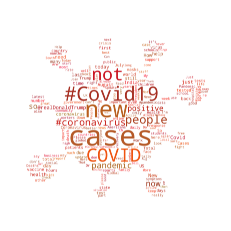

In [107]:
wordcloud = WordCloud(mask=mask, width=800, height=600, background_color="white", color_func=get_color)
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
text = {k:v for k,v in aw_sorted}

wordcloud.generate_from_frequencies(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

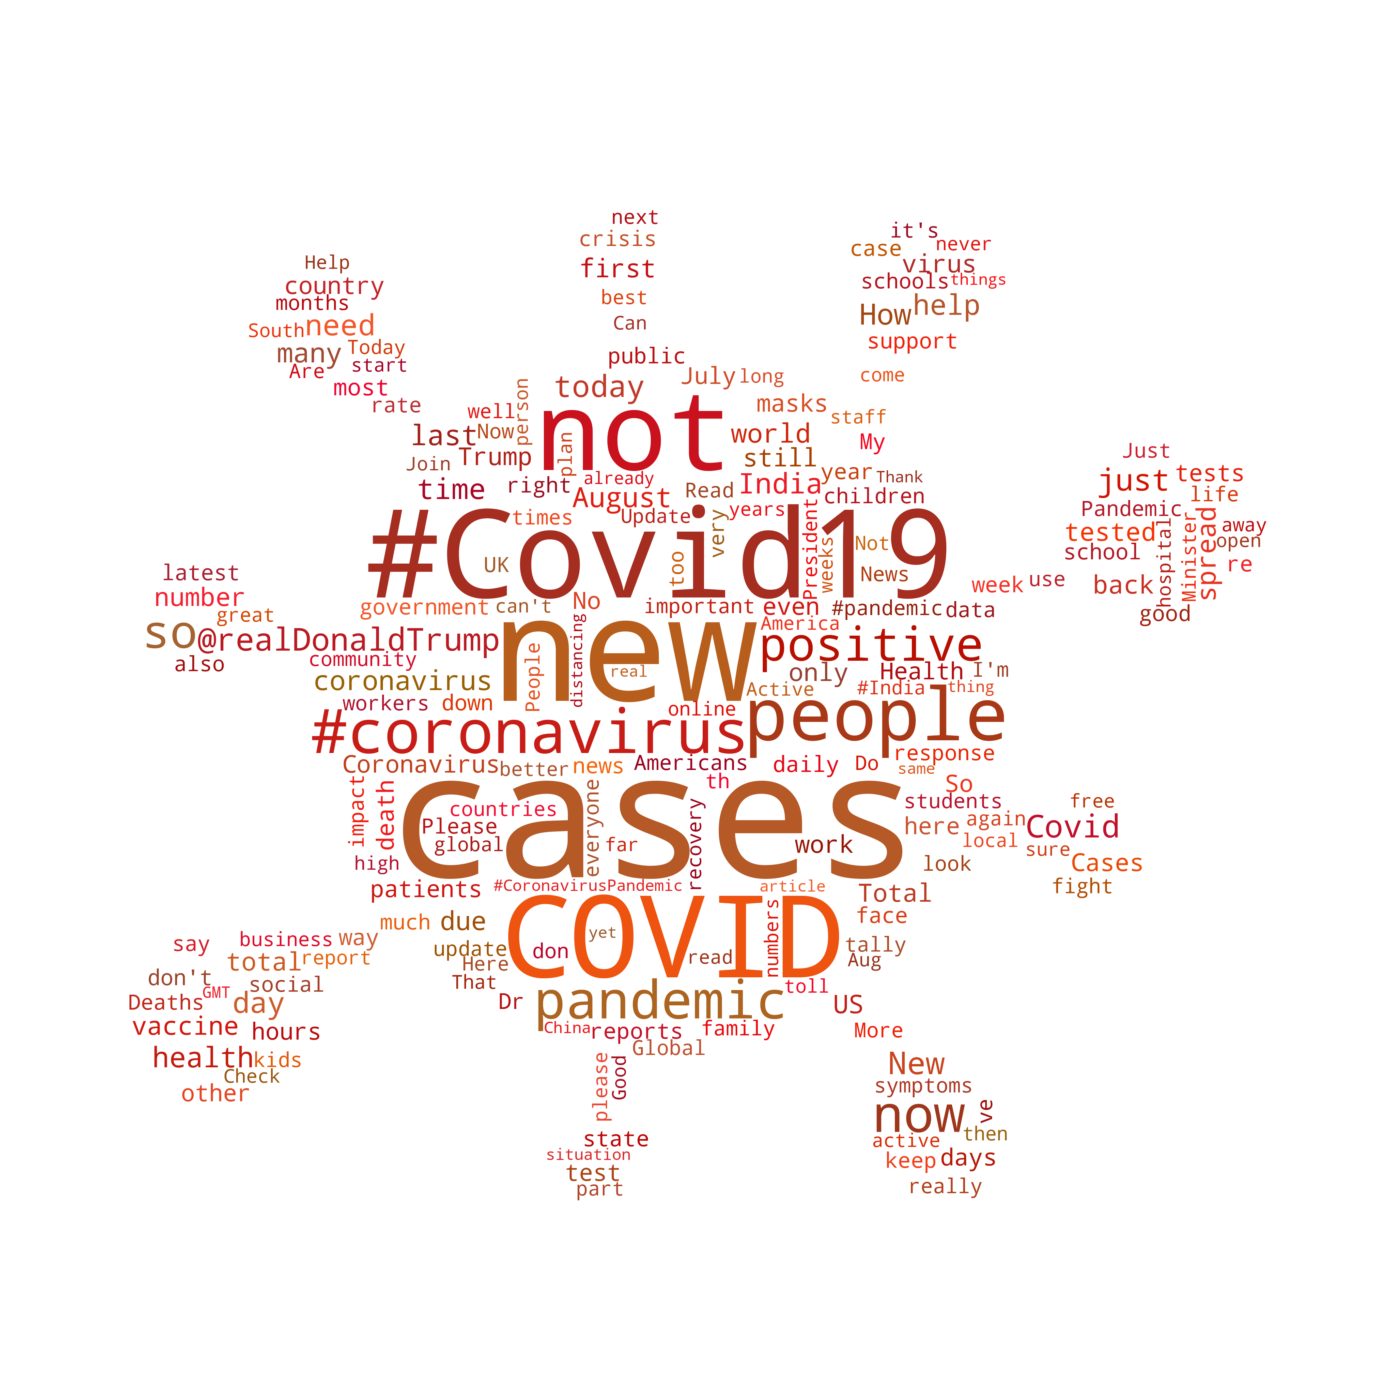

In [117]:
fig, ax = plt.subplots(figsize=(60, 35))
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
fig.savefig("covid_wordcloud3.png")